Гончаренко Д. Вариант 7

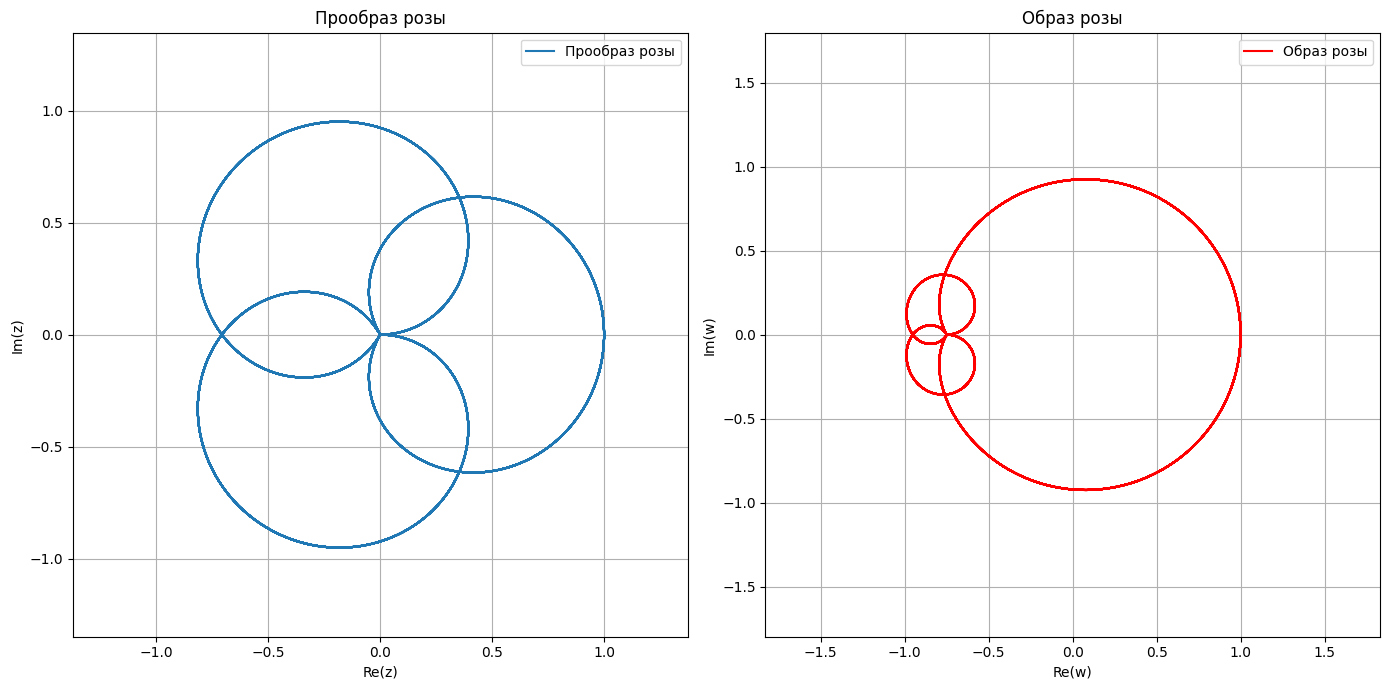

In [9]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 1.0
beta = 3 / 4

def rose(t, alpha, beta):
    return alpha * np.abs(np.cos(beta * t))

t = np.linspace(0, 50 * np.pi, 50000)
z = rose(t, alpha, beta) * np.exp(1j * t)

def f(z):
    return (4 * z - 3) / (4 - 3 * z)

w = f(z)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(z.real, z.imag, label='Прообраз розы')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('Прообраз розы')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.subplot(1, 2, 2)
plt.plot(w.real, w.imag, label='Образ розы', color='r')
plt.xlabel('Re(w)')
plt.ylabel('Im(w)')
plt.title('Образ розы')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.xlim(-20, 20)
plt.ylim(-2, 2)

plt.tight_layout()
plt.show()


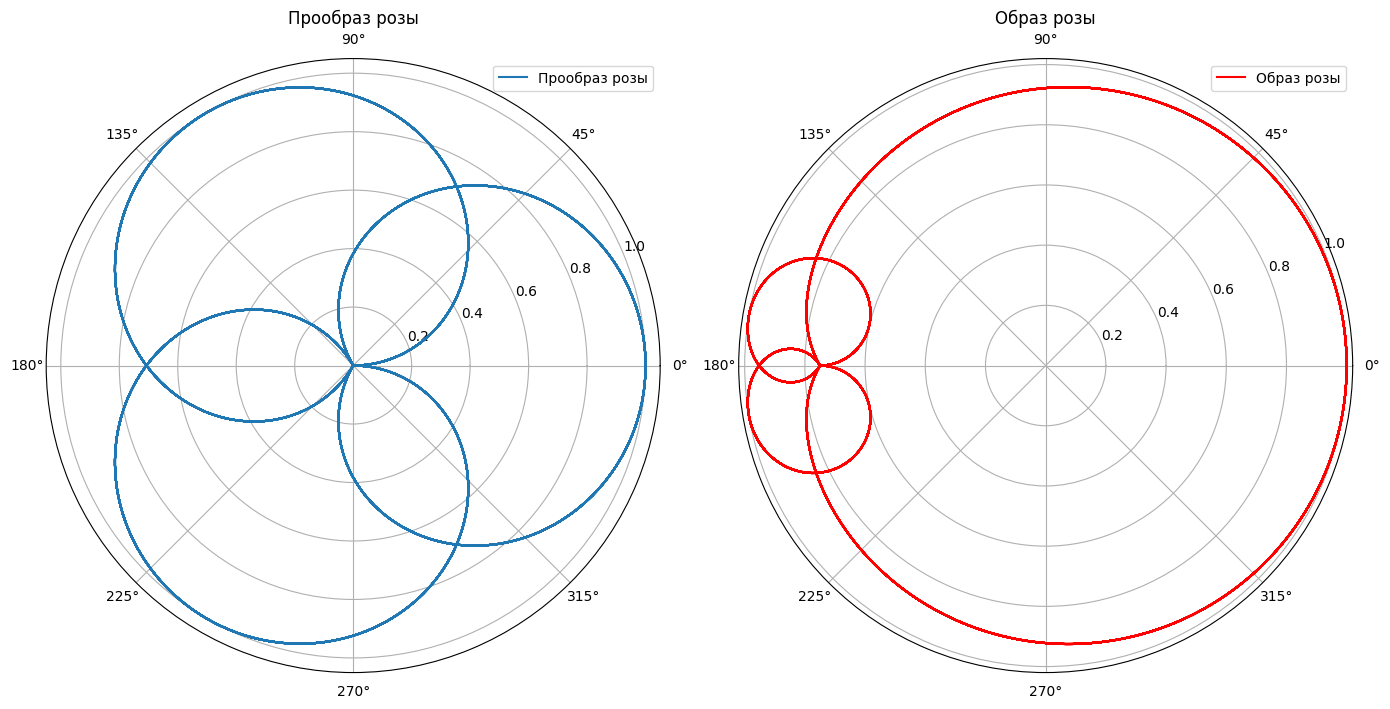

In [10]:

import numpy as np
import matplotlib.pyplot as plt

alpha = 1.0
beta = 3 / 4

def rose(t, alpha, beta):
    return alpha * np.abs(np.cos(beta * t))

t = np.linspace(0, 50 * np.pi, 50000)
z = rose(t, alpha, beta) * np.exp(1j * t)

def f(z):
    return (4 * z - 3) / (4 - 3 * z)

w = f(z)

plt.figure(figsize=(14, 7))

# Plot in polar coordinates
ax1 = plt.subplot(1, 2, 1, projection='polar')
ax1.plot(np.angle(z), np.abs(z), label='Прообраз розы')
ax1.set_title('Прообраз розы')
ax1.legend()
ax1.grid(True)

ax2 = plt.subplot(1, 2, 2, projection='polar')
ax2.plot(np.angle(w), np.abs(w), label='Образ розы', color='r')
ax2.set_title('Образ розы')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

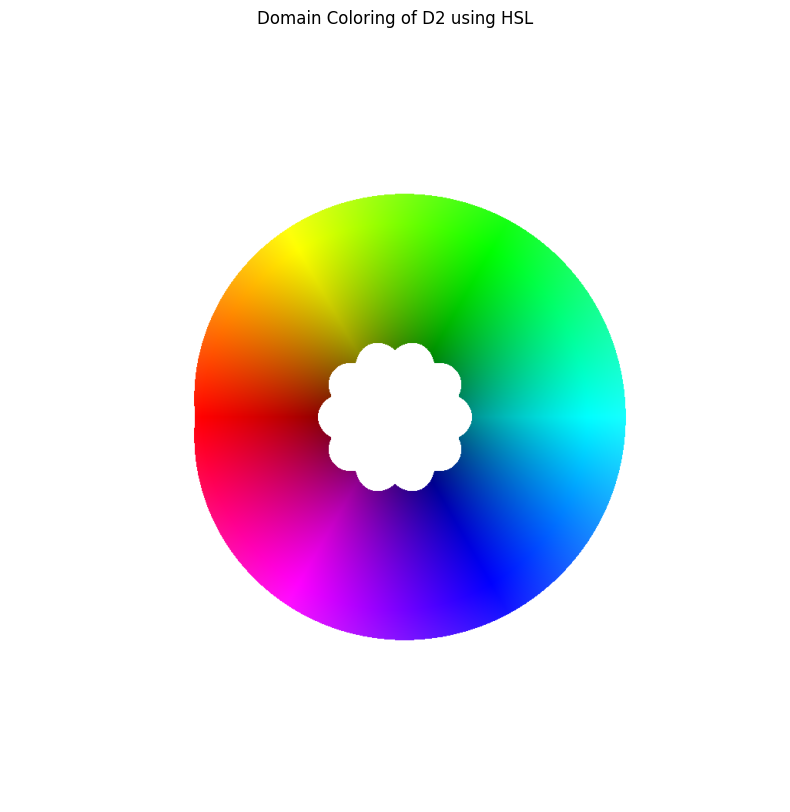

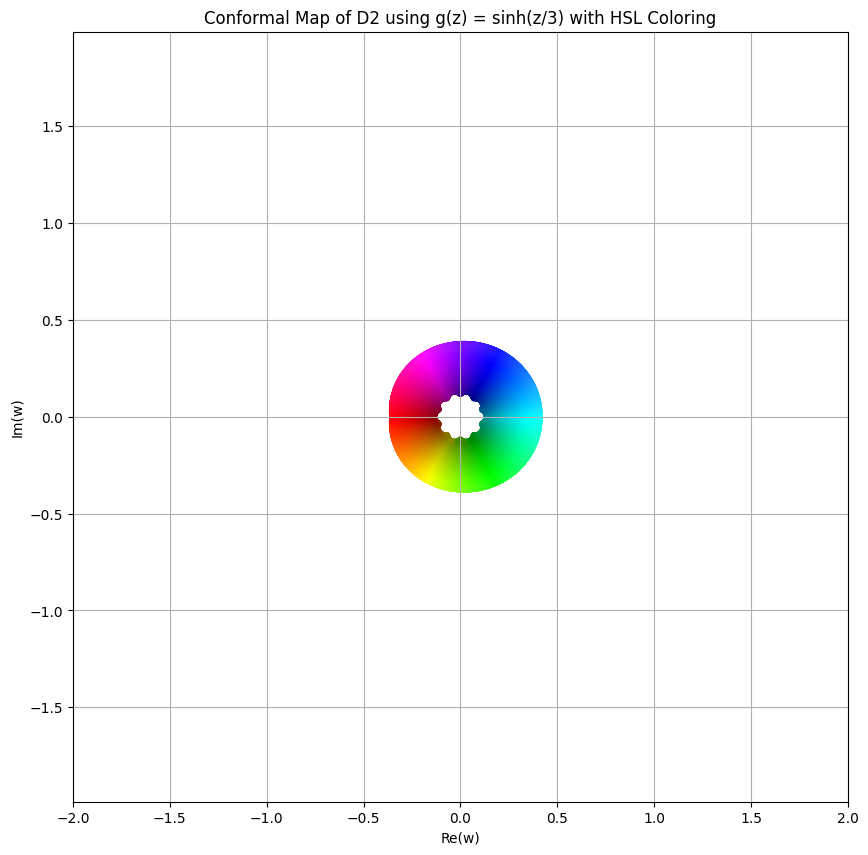

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def hsl_coloring(z, a=1):
    h = np.angle(z) / (2 * np.pi) + 0.5 
    s = np.ones_like(z, dtype=float) 
    l = (np.abs(z)**a) / (np.abs(z)**a + 1) 
    return np.dstack((h, s, l)).astype(float)

def to_rgb(hsl):
    h, s, l = hsl[..., 0], hsl[..., 1], hsl[..., 2]
    c = (1 - np.abs(2 * l - 1)) * s
    x = c * (1 - np.abs(np.mod(h * 6, 2) - 1))
    m = l - c / 2

    rgb = np.zeros(hsl.shape, dtype=float)

    h = h * 6
    i = (h < 1)
    rgb[i] = np.dstack((c[i], x[i], np.zeros_like(c[i]))) + m[i][..., np.newaxis]

    i = (1 <= h) & (h < 2)
    rgb[i] = np.dstack((x[i], c[i], np.zeros_like(c[i]))) + m[i][..., np.newaxis]

    i = (2 <= h) & (h < 3)
    rgb[i] = np.dstack((np.zeros_like(c[i]), c[i], x[i])) + m[i][..., np.newaxis]

    i = (3 <= h) & (h < 4)
    rgb[i] = np.dstack((np.zeros_like(c[i]), x[i], c[i])) + m[i][..., np.newaxis]

    i = (4 <= h) & (h < 5)
    rgb[i] = np.dstack((x[i], np.zeros_like(c[i]), c[i])) + m[i][..., np.newaxis]

    i = (5 <= h) & (h < 6)
    rgb[i] = np.dstack((c[i], np.zeros_like(c[i]), x[i])) + m[i][..., np.newaxis]

    rgb = np.clip(rgb, 0, 1) 
    return rgb

alpha1, beta1, alpha2, beta2 = 0.4, 5/3, 1.2, 1/6
grid_size = 1000
x = np.linspace(-2, 2, grid_size)
y = np.linspace(-2, 2, grid_size)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

R = np.abs(Z)
Arg = np.angle(Z)
max_cos1 = np.abs(np.cos(beta1 * (Arg + 2 * np.pi * np.arange(-10, 11)[:, None, None]))).max(axis=0)
max_cos2 = np.abs(np.cos(beta2 * (Arg + 2 * np.pi * np.arange(-10, 11)[:, None, None]))).max(axis=0)
mask = (alpha1 * max_cos1 <= R) & (R <= alpha2 * max_cos2)

hsl = hsl_coloring(Z)
rgb = to_rgb(hsl)
rgb[~mask] = 1

plt.figure(figsize=(10, 10))
plt.imshow(rgb, extent=[-2, 2, -2, 2])
plt.title('Domain Coloring of D2 using HSL')
plt.axis('off')
plt.show()


def conformal_map(z):
    return np.sinh(z / 3)

def inverse_conformal_map(w):
    return 3 * np.arcsinh(w)

Z_masked = Z[mask]

hsl_masked = hsl_coloring(Z_masked)
rgb_masked = to_rgb(hsl_masked)

W_direct = conformal_map(Z_masked)

plt.figure(figsize=(10, 10))
plt.scatter(W_direct.real, W_direct.imag, c=rgb_masked.reshape(-1, 3), marker='.')
plt.xlabel('Re(w)')
plt.ylabel('Im(w)')
plt.title(f'Conformal Map of D2 using g(z) = sinh(z/3) with HSL Coloring')
plt.axis('equal')
plt.grid(True)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()